# Can You Feed The Hot Hand?
23 October 2020

In [1]:
import random

import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

rand = random.random  # Just a convenient shorthand

# Problem

https://fivethirtyeight.com/features/can-you-feed-the-hot-hand/


Now that LeBron James and Anthony Davis have restored the Los Angeles Lakers to glory with their [recent victory](https://fivethirtyeight.com/features/lebron-and-ad-are-the-heroes-but-the-sum-of-this-laker-club-was-more-than-its-superstar-parts/) in the NBA Finals, suppose they decide to play a game of sudden-death, one-on-one basketball. They’ll flip a coin to see which of them has first possession, and whoever makes the first basket wins the game.

Both players have a 50 percent chance of making any shot they take. However, Davis is the [superior rebounder](https://www.espn.com/nba/stats/player/_/season/2020/seasontype/2/table/general/sort/avgRebounds/dir/desc) and will always rebound any shot that either of them misses. Every time Davis rebounds the ball, he dribbles back to the three-point line before attempting another shot.

Before each of Davis’s shot attempts, James has a probability $p$ of stealing the ball and regaining possession before Davis can get the shot off. What value of $p$ makes this an evenly matched game of one-on-one, so that both players have an equal chance of winning before the coin is flipped?

# Solution

The correct solution is $p = 1/3$. I've included several methods of arriving at that answer, starting with a consideration of the boundary conditions, and including linear extrapolation, probability tree analysis, a formal algebraic approach, and empirical testing.

## Boundaries

Let's start by considering the extremes. If $p = 1$, James successfully steals the ball away from Davis before he can shoot, every time. Since Davis can never shoot, James wins 100% of the time.

On the other hand, if $p = 0$, then Davis wins as soon as he gets the ball, because James has no way to ever get it back. James's only chance to win is to win the coin flip (50% chance) and sink his first and only shot (another 50% chance). In this scenario, James will win 50% * 50% = 25% of the time.

## Linear Extrapolation

Let's assume that James's chance of winning is a linear function of $p$. Using the two boundary points we reasoned out above, we can draw the line, and find where it intersects with 50% (the target chance of winning). If $P_j$ is the probability of a James win, this is the equation of the line in question:
$$
P_j = \frac{3}{4}p + \frac{1}{4} = \frac{1 + 3p}{4}
$$

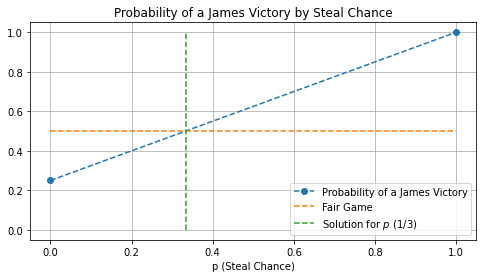

In [2]:
fig, ax = plt.subplots(figsize=(8, 4))

# Data
x = [0, 1]
y = [0.25, 1]
ax.plot(x, y, marker="o", linestyle="--", label="Probability of a James Victory")

# Horizontal/vertical lines to illustrate intersection point
ax.plot([0, 1], [0.5, 0.5], linestyle="--", label="Fair Game")
ax.plot([1 / 3, 1 / 3], [0, 1], linestyle="--", label="Solution for $p$ ($1/3$)")

# Labels, formatting, etc.
overshoot = 0.05
ax.set_xlim(0 - overshoot, 1 + overshoot)
ax.set_ylim(0 - overshoot, 1 + overshoot)
ax.set_xlabel("p (Steal Chance)")
ax.set_title("Probability of a James Victory by Steal Chance")
ax.legend()
ax.grid()

plt.show()

If our assumption is correct, then the value for $p$ that yields a perfectly fair game is $1/3$.

## Probability Tree Analysis

Let's test our solution by setting $p = 1/3$ and trying to resolve the probability tree of the resulting game. We start with the coinflip.
```
|- 1/2 James possession
|- 1/2 Davis possession
```

If James makes his shot, he wins. Otherwise, Davis gets the rebound.
```
|- 1/2 James possession
   |- 1/2 James victory
   |- 1/2 Davis possession
|- 1/2 Davis possession
```

Davis possessions are a bit more complex. There's a $1/3$ chance that James steals before the shot, leading back to a James possession. In half of the remaining scenarios, Davis makes his shot and wins. In the other half, he misses but gets the rebound, leading back to another Davis possession.
```
|- 1/2 James possession
   |- 1/2 James victory
   |- 1/2 Davis possession
|- 1/2 Davis possession
   |- 1/3 James possession
   |- 1/3 Davis victory
   |- 1/3 Davis possession
```

We already know the breakdown for a James possession, so let's plug that into the Davis possession branch. We can resolve the top-level instance as well, to reduce the number of states we need to consider.
```
|- 1/4 James victory
|- 3/4 Davis possession
   |- 1/6 James victory
   |- 1/3 Davis victory
   |- 1/2 Davis possession
```

Now all we need to do is resolve the recursion in the Davis possession branch. The solution becomes apparent after another layer:
```
|- 1/4 James victory
|- 3/4 Davis possession
   |- 1/6 James victory
   |- 1/3 Davis victory
   |- 1/2 Davis possession
       |- 1/6 James victory
       |- 1/3 Davis victory
       |- 1/2 Davis possession
```

Resolving:
```
|- 1/4 James victory
|- 3/4 Davis possession
   |- 1/4 James victory
   |- 1/2 Davis victory
   |- 1/4 Davis possession
```

Let's repeat the above two steps one more time for clarity:
```
|- 1/4 James victory
|- 3/4 Davis possession
   |- 7/24 James victory
   |- 7/12 Davis victory
   |- 3/24 Davis possession
```

If we take this to infinity, the recursive Davis possession case will go to zero, and the James victory branch will still be half as likely as the Davis victory branch. We end up with this:
```
|- 1/4 James victory
|- 3/4 Davis possession
   |- 1/3 James victory
   |- 2/3 Davis victory
```

Which resolves to a perfectly fair game:
```
|- 1/2 James victory
|- 1/2 Davis possession
```

## Algebraic Analysis

The probability tree analysis was more intuitive than rigorous. Let's now do a rigorous, algebraic approach to prove the solution.

### The Setup

Consider a two-dimensional vector space $\mathbb{V}$, spanned by the linearly independent unit vectors $\hat{d}$, representing a Davis victory, and $\hat{j}$, representing a James victory. A valid probability vector $\vec{P}$ representing our one-on-one scenario can be expressed as a linear combination in $\mathbb{V}$, where the coefficients represent probabilities:
$$
\vec{P} = P_d\hat{d} + P_j\hat{j} \\
P_d + P_j = 1
$$

For a perfectly fair game, $P_d = P_j = \frac{1}{2}$.

### Defining Possessions in $\mathbb{V}$

Now, consider also the vectors $\vec{D}$ and $\vec{J}$, representing Davis possessions and James possessions, respectively. Borrowing from the tree analysis, we can infer expressions for these vectors from the description of the game:
$$
\vec{J} = \frac{1}{2}\hat{j} + \frac{1}{2}\vec{D} \\
\vec{D} = p\vec{J} + \frac{1-p}{2}\hat{d} + \frac{1-p}{2}\vec{D}
$$

Now, instead of dealing with recursion, we can simply solve this system algebraically. Plugging the top equation into the bottom one gives us this line:
$$
\vec{D} = p\left(\frac{1}{2}\hat{j} + \frac{1}{2}\vec{D}\right) + \frac{1-p}{2}\hat{d} + \frac{1-p}{2}\vec{D} \\
\vec{D} = \frac{p}{2}\hat{j} + \frac{1-p}{2}\hat{d} + \frac{1}{2}\vec{D} \\
\vec{D} = p\hat{j} + (1-p)\hat{d} \\
$$

Plugging in to solve for $\vec{J}$:
$$
\vec{J} = \frac{1}{2}\hat{j} + \frac{1}{2}\left(p\hat{j} + (1-p)\hat{d}\right) \\
\vec{J} = \frac{1+p}{2}\hat{j} + \frac{1-p}{2}\hat{d}
$$

### Sense Check

Let's pause for a quick sense check. Remember the boundaries -- if we set $p = 0$, a Davis possession should always lead to a Davis win, and a James possession should become a 50/50 game. Our equations validate that:
$$
\vec{D} = 0\hat{j} + (1-0)\hat{d} = \hat{d} \\
\vec{J} = \frac{1+0}{2}\hat{j} + \frac{1-0}{2}\hat{d} = \frac{1}{2}\hat{j} + \frac{1}{2}\hat{d}
$$

If we set $p = 1$, James should win every time. Our equations reflect that as well:
$$
\vec{D} = 1\hat{j} + (1-1)\hat{d} = \hat{j} \\
\vec{J} = \frac{1+1}{2}\hat{j} + \frac{1-1}{2}\hat{d} = \hat{j}
$$

Ok, since we've validated this, let's move onto the solution.

### Solution

The final step is to express our game in terms of its initial conditions -- the coin flip.
$$
\vec{P} = \frac{1}{2}\vec{D} + \frac{1}{2}\vec{J} \\
$$

Now we just plug in our equations and solve.
$$
\vec{P} = \frac{1}{2}\left(p\hat{j} + (1-p)\hat{d}\right) + \frac{1}{2}\left(\frac{1+p}{2}\hat{j} + \frac{1-p}{2}\hat{d}\right) \\
\vec{P} = \frac{1 + 3p}{4}\hat{j} + \frac{3 - 3p}{4}\hat{d}
$$

Note that the coefficient for a James victory is here expressed as $P_j = \frac{1 + 3p}{4}$, which is precisely the relationship we guessed at in the linear extrapolation section.

For a fair game, we need both coefficients to be equal to $1/2$. Just as before, we can satisfy this requirement with $p = 1/3$.

## Empirical Analysis

For bonus points, let's do some simulations and see if the results validate our solution. I've set up a class that takes $p$ as an input and simulates a single game. Below you can see the result of a single game. Run the code with different parameters to test its validity.

In [3]:
LB = "LeBron James"
AD = "Anthony Davis"
PROB_START_AD = 0.5
SHOT_PCT = {
    LB: 0.5,
    AD: 0.5,
}

class Game:
    """A sudden-death, one-on-one basketball match between LeBron and AD."""
    def __init__(self, p: float):
        """
        Args:
            p: The probability that LeBron will steal the ball and regain
                possession before AD can get the shot off.
        """
        self.p = p
        self.winner = None
        
        # Determine first possession
        self.first_possession = LB
        if rand() < PROB_START_AD:
            self.first_possession = AD
        
        # Play
        self.possession = self.first_possession
        self.record = []
        self.turn = 1
        while self.winner is None:
            result = self.play()
            self.record.append(dict(turn=self.turn, **result))
            self.turn += 1
    
    def play(self):
        possession = self.possession
        steal_rng = None
        steal = False
        shot_rng = None
        made_it = False

        if possession == AD:
            # If AD has the ball, check whether LB steals
            steal_rng = rand()
            if steal_rng < self.p:
                steal = True
                self.possession = LB

        if not steal:
            # Take the shot
            shot_rng = rand()
            if shot_rng < SHOT_PCT[possession]:
                made_it = True
                self.winner = possession
            else:
                self.possession = AD  # AD rebounds
        
        return dict(
            possession=possession,
            steal_prob=self.p,
            steal_rng=steal_rng,
            steal=steal,
            shot_prob=SHOT_PCT[possession],
            shot_rng=shot_rng,
            made_it=made_it,
        )

g = Game(p=0.25)
pd.DataFrame(g.record)

,turn,possession,steal_prob,steal_rng,steal,shot_prob,shot_rng,made_it
0,1,LeBron James,0.25,None,False,0.5,0.45097,True


Now, let's run trials. For each of 200 $p$ values evenly spaced from 0 to 1, we'll run 100 trials of 100 games each, and take the mean number of games won by James. These parameters are all adjustable.

In [4]:
resolution = 200  # number of p values to take between 0 and 1
num_trials = 100
games_per_trial = 100

x = []  # p
y = []  # mean LB win percentage

for i in tqdm(range(resolution)):
    p = i / resolution
    win_pct_sum = 0
    for _ in range(num_trials):
        lb_wins = 0
        for _ in range(games_per_trial):
            g = Game(p)
            if g.winner == LB:
                lb_wins += 1
        lb_win_pct = lb_wins / games_per_trial
        win_pct_sum += lb_win_pct
    x.append(p)
    y.append(win_pct_sum / num_trials)

100%|██████████| 200/200 [00:14<00:00, 13.79it/s]


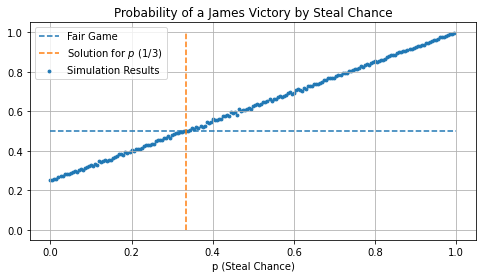

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

# Data
ax.scatter(x, y, s=8, label="Simulation Results")

# Horizontal/vertical lines to illustrate intersection point
ax.plot([0, 1], [0.5, 0.5], linestyle="--", label="Fair Game")
ax.plot([1 / 3, 1 / 3], [0, 1], linestyle="--", label="Solution for $p$ ($1/3$)")

# Labels, formatting, etc.
overshoot = 0.05
ax.set_xlim(0 - overshoot, 1 + overshoot)
ax.set_ylim(0 - overshoot, 1 + overshoot)
ax.set_xlabel("p (Steal Chance)")
ax.set_title("Probability of a James Victory by Steal Chance")
ax.legend()
ax.grid()

plt.show()

Noise aside, our simulation is telling us the same thing as all the analysis to date, so we can be fairly certain that the correct solution is $p = 1/3$.